<a href="https://colab.research.google.com/github/saisasi-choda/ML/blob/main/MNIST_MLP_DIGIT_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical, plot_model
import pandas as pd

In [3]:
from tensorflow.keras.datasets import mnist

In [90]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [91]:
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [92]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
y_train.shape

(60000, 10)

In [97]:
x_train=np.reshape(x_train,[-1,784])
x_test=np.reshape(x_test,[-1,784])

In [98]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout, Activation

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(units=256, activation='relu', input_dim=784),
    Dropout(0.45),
    Dense(units=256, activation='relu'),
    Dropout(0.45),
    Dense(units=10, activation='softmax')
])


In [73]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               200960    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 10)                2570      
                                                                 
Total params: 269322 (1.03 MB)
Trainable params: 269322 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


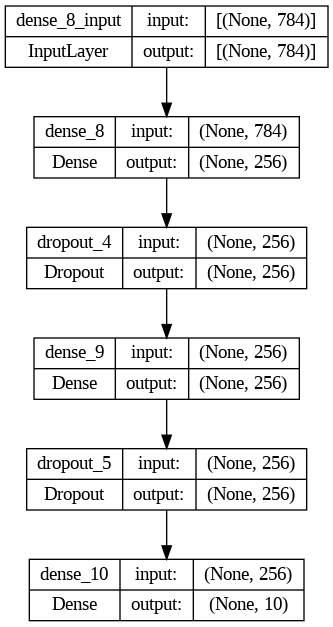

In [74]:
from tensorflow.keras.utils import plot_model
plot_model(model,to_file='mlp_mnist.png',show_shapes=True)

In [101]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [102]:
model.fit(x_train,y_train,epochs=20,batch_size=128)

Epoch 1/20
469/469 [==============================] - 6s 11ms/step - loss: 1.1432 - accuracy: 0.6276
Epoch 2/20
469/469 [==============================] - 37s 10ms/step - loss: 0.4992 - accuracy: 0.8490
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3949 - accuracy: 0.8823
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.3366 - accuracy: 0.8996
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.3016 - accuracy: 0.9107
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2719 - accuracy: 0.9191
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2483 - accuracy: 0.9266
Epoch 8/20
469/469 [==============================] - 5s 10ms/step - loss: 0.2285 - accuracy: 0.9311
Epoch 9/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2130 - accuracy: 0.9372
Epoch 10/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1998 - accuracy: 0

In [104]:
acc=model.evaluate(x_test,y_test,batch_size=128,verbose=0)
print(acc)

[0.09830675274133682, 0.9689000248908997]
